**Individual Question**: “How do the costs of various housing units across different communities affect vacancy rates, and has the timeline between the two years affected those costs? Does this in turn affect vacancy rates as well and by how much?” 

-----

# **Data Cleaning:**
- Some remaining excel cleaning was done for both the Individual Town Summaries, as well as Table 9 (Population Sizes of Communities)
    - Individual Town Summaries --> isolating "Number of Units and Vacancies by Unit Type", reformatting so it 
    - Table 9 --> 
- For the rest of the data cleaning in python (pandas), 

In [1]:
# Cleaning Table 10: Population Values (this will be used for splitting communities into small, medium and large sections)
import pandas as pd
pd.options.mode.chained_assignment = None # cancels SettingWithCopyWarning on the value imputation, which doesn't actually cause any issues

# read dataset csvs
table6 = pd.read_csv("Matthew's Data/Table6.csv")
table8 = pd.read_csv("Matthew's Data/Table8.csv")
table10 = pd.read_csv("Matthew's Data/table10.csv")

# create list of all strings that contain the names of communities in table 8
community_names = table8["Community"].unique().tolist()

# filter the csv based on if it exists in the observed commmunities list (those included in table 8)
table10_byAreaNames = table10[table10["Area Name"].isin(community_names)]

# IMPUTATION WARNING: Grande Cache's population value is marked with "--" but after 
table10_byAreaNames.loc[table10_byAreaNames["Area Name"] == "Grande Cache"] = table10_byAreaNames.loc[table10_byAreaNames["Area Name"] == "Grande Cache"].replace("--", "3276")

# convert 2022 and 2021 column to integer values (since it is currently being read as string)
table10_byAreaNames["2022"] = table10_byAreaNames["2022"].apply(lambda x: int(x))

# We take the most recent population for dividing into bins (2022), so we drop the 2021 population
table10_byAreaNames.drop(["2021"],axis=1,inplace=True)

# display populations (alphabetical order)
table10_cleaned = table10_byAreaNames.sort_values("Area Name")
table10_cleaned


# Population Table (table10.csv) exported from https://open.alberta.ca/dataset/alberta-population-estimates-data-tables 
# SettingWithCopyWarning: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas  
#         

,Area Name,Type,2022
308,Athabasca,T,2827
330,Banff,T,9347
296,Barrhead,T,4503
26,Bassano,T,1255
409,Beaverlodge,T,2371
...,...,...,...
183,Vegreville,T,5819
190,Vermilion,T,3978
59,Vulcan,T,1825
131,Wainwright,T,6741


In [2]:
# remove table8 zeroes (since this is false data)
table8 = table8[table8["2021 Weighted Rent"] != 0]
table8 = table8[table8["2022 Weighted Rent"] != 0]

table8

,Community,Unit Type,2021 Weighted Rent,2022 Weighted Rent
0,Athabasca,1 - Bedroom,840,852
1,Athabasca,2 - Bedroom,912,931
2,Athabasca,3 - Bedroom,1026,980
3,Athabasca,Bachelor,706,719
4,Banff,1 - Bedroom,1318,1435
...,...,...,...,...
247,Wainwright,Bachelor,450,434
248,Westlock,1 - Bedroom,775,768
249,Westlock,2 - Bedroom,881,881
250,Westlock,3 - Bedroom,972,963


--------------------------------------------
### **Cleaning data for individual summaries**

I sampled a few towns by community size range (small, medium, big), selecting those with various trends in rent (including how large/small compared to average and whether there is increase or decrease in rent) and how it affects both individual and overall vacancy between those two years, some which are similar and can be compared to similar towns in other sizes.

Reasons why I chose these towns based:

<u>Small</u>:
- Bruderheim --> No change in rent however extreme difference from average (3-bed is super low, 1-bed and 2-bed is super high)
- Fox Creek --> Rents higher than average and increasing, also wonder how this compares to slave lake which shows similar trends but is from a larger population size
- Falher --> Noticeably lower Rents than Average 
- Millet --> Less housing units, slightly higher costs 
- Mclennan --> Less housing units, lower costs than average

<u>Medium</u>:
- Jasper --> Rents are much higher than average, but experienced NO change in vacancies (0% both years)
- Claresholm --> Rents below average and has an increasing trend 
- Grimshaw --> Less housing units -> rents above average 
- Raymond --> Less housing units -> rents below average 
- Fort Macleod --> Has rents for 4+ Bedrooms

<u>Large</u>:
- Slave Lake --> Rents much higher than average and incresing (similar to Fox Creek)
- Ponoka --> Similar trend to High Prairie (3bed higher than others, which are closer to average) 
- Banff --> Higher rents than average and also 4+ Bedrooms -> compared to fort macleod
- Taber --> Rents below average, increase trend -> increase in vacancy -> compared with claresholm
- Edson --> Similar to Ponoka BUT rents for 1 beds,2 beds and bachelor are now noticeably above average 

-------------

In [3]:
# Tuples for multilevel index where outer is the two years and inner is the unit type
multigrouping = [("2021", "Bachelor"),("2021", "1 - Bedroom"), ("2021", "2 - Bedroom"), ("2021", "3 - Bedroom"),("2021", "4+ Bedroom"),
                  ("2022", "Bachelor"), ("2022", "1 - Bedroom"), ("2022", "2 - Bedroom"), ("2022", "3 - Bedroom"),("2022", "4+ Bedroom"),]

## Small Towns

In [4]:
# Individual Vacancies for Bruderheim in 2022
bruderheim_vacancies = pd.read_csv("Matthew's Data/Summaries/Bruderheim Summary.csv")

# Set row index as the labels - # of units, # of vacancies, and percent (vacancy rate)
bruderheim_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)

# This (as well as a few other summaries) had some extra empty rows/columns after excel cleanup so we remove them here
bruderheim_vacancies = bruderheim_vacancies.dropna(how='all',axis=1)
bruderheim_vacancies = bruderheim_vacancies.dropna(how='all',axis=0)

# Convert decimals to percent in "Percentage" row
bruderheim_vacancies

# Add 2021 Vacancies:
bruderheim_vacancies_2021 = pd.DataFrame({
    "Bachelor": [4,1,25], 
    "1 - Bedroom":[36,19, 52.8], 
    "2 - Bedroom": [36, 11, 30.6], 
    "3 - Bedroom": [4, 0, 0], 
    "4+ Bedroom": [80,31,38.8]
    })

# "index setter" for all 
attributes = bruderheim_vacancies.index

bruderheim_vacancies_2021.index = attributes
bruderheim_vacancies = pd.concat([bruderheim_vacancies_2021, bruderheim_vacancies], axis=1)

bruderheim_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

bruderheim_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           4        36.0   
Vacancies                                                 1        19.0   
Percentage                                               25        52.8   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           36.0           4   
Vacancies                                                 11.0           0   
Percentage                                                30.6           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                          80.0      4.0   
Vacancies                                                31.0      2.0   
Percentage                                               38.8      0.5   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         36.000      36.000   
Vacancies                                               19.000      12.000   
Percentage                                               0.528       0.333   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                           4.00        0.0  
Vacancies                                                 3.00        0.0  
Percentage                                                0.75        0.0

In [5]:
foxcreek_vacancies = pd.read_csv("Matthew's Data/Summaries/Fox Creek Summary.csv")
foxcreek_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)

foxcreek_vacancies_2021 = pd.DataFrame({
    "Bachelor": [3,0,0], 
    "1 - Bedroom":[57,28, 49.1], 
    "2 - Bedroom": [109, 62, 56.9], 
    "3 - Bedroom": [14, 5, 35.7], 
    "4+ Bedroom": [0,0,0]})

foxcreek_vacancies_2021.index = attributes
foxcreek_vacancies = pd.concat([foxcreek_vacancies_2021, foxcreek_vacancies], axis=1)

foxcreek_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)
foxcreek_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           3        57.0   
Vacancies                                                 0        28.0   
Percentage                                                0        49.1   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          109.0        14.0   
Vacancies                                                 62.0         5.0   
Percentage                                                56.9        35.7   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      1.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         36.000      55.000   
Vacancies                                               21.000      35.000   
Percentage                                               0.583       0.636   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            5.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

In [6]:
falher_vacancies = pd.read_csv("Matthew's Data/Summaries/Falher Summary.csv")
falher_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
falher_vacancies = falher_vacancies.dropna(how='all',axis=1)
falher_vacancies = falher_vacancies.dropna(how='all',axis=0)

falher_vacancies_2021 = pd.DataFrame({
    "Bachelor": [2,0,0], 
    "1 - Bedroom":[18,0,0], 
    "2 - Bedroom": [21, 1, 0.048], 
    "3 - Bedroom": [7, 1, 0.143], 
    "4+ Bedroom": [0,0,0]})

falher_vacancies_2021.index = attributes
falher_vacancies = pd.concat([falher_vacancies_2021, falher_vacancies], axis=1)

falher_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

falher_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           2          18   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         21.000       7.000   
Vacancies                                                1.000       1.000   
Percentage                                               0.048       0.143   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      2.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          20.00      24.000   
Vacancies                                                 3.00       2.000   
Percentage                                                0.15       0.083   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                          7.000        0.0  
Vacancies                                                1.000        0.0  
Percentage                                               0.143        0.0

In [7]:
millet_vacancies = pd.read_csv("Matthew's Data/Summaries/Millet Summary.csv")
millet_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
millet_vacancies = millet_vacancies.dropna(how='all',axis=1)
millet_vacancies = millet_vacancies.dropna(how='all',axis=0)

millet_vacancies_2021 = pd.DataFrame({
    "Bachelor": [0,0,0], 
    "1 - Bedroom":[4,1,25], 
    "2 - Bedroom": [15,2,13.3], 
    "3 - Bedroom": [0,0,0], 
    "4+ Bedroom": [0,0,0]})

millet_vacancies_2021.index = attributes
millet_vacancies = pd.concat([millet_vacancies_2021, millet_vacancies], axis=1)

millet_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)
millet_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           0           4   
Vacancies                                                 0           1   
Percentage                                                0          25   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           15.0           0   
Vacancies                                                  2.0           0   
Percentage                                                13.3           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      0.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                            5.0        14.0   
Vacancies                                                  0.0         0.0   
Percentage                                                 0.0         0.0   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            0.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

In [8]:
mclennan_vacancies = pd.read_csv("Matthew's Data/Summaries/Mclennan Summary.csv")
mclennan_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
mclennan_vacancies = mclennan_vacancies.dropna(how='all',axis=1)
mclennan_vacancies = mclennan_vacancies.dropna(how='all',axis=0)

mclennan_vacancies_2021 = pd.DataFrame({
    "Bachelor": [0,0,0], 
    "1 - Bedroom":[12,0,0], 
    "2 - Bedroom": [15,0,0], 
    "3 - Bedroom": [0,0,0], 
    "4+ Bedroom": [0,0,0]})

mclennan_vacancies_2021.index = attributes

mclennan_vacancies = pd.concat([mclennan_vacancies_2021, mclennan_vacancies], axis=1)

mclennan_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)
mclennan_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           0          12   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                             15           0   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      0.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         12.000        12.0   
Vacancies                                                1.000         0.0   
Percentage                                               0.083         0.0   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            0.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

------

# Medium Towns

In [9]:
# Jasper
# This (and banff) had to manually get the values from the linked pdf for since sheet didn't have it (https://open.alberta.ca/dataset/fb9452c6-395e-45a8-8149-645956fd83ac/resource/e07f0421-a710-4c3c-9bbf-392285493e6b/download/scss-apartment-vacancy-rental-cost-survey-2022.pdf)
jasper_vacancies = pd.DataFrame({
    "Bachelor": [149,0,0], 
    "1 - Bedroom":[112,0,0], 
    "2 - Bedroom": [75,0,0], 
    "3 - Bedroom": [21,0,0], 
    "4+ Bedroom": [0,0,0]
})
jasper_vacancies.index = attributes

jasper_vacancies2021 = pd.DataFrame({
    "Bachelor": [147,0,0], 
    "1 - Bedroom":[82,0,0], 
    "2 - Bedroom": [26,0,0], 
    "3 - Bedroom": [2,0,0], 
    "4+ Bedroom": [0,0,0]
})
jasper_vacancies2021.index = attributes

jasper_vacancies = pd.concat([jasper_vacancies2021, jasper_vacancies], axis=1)
jasper_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

jasper_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                         147          82   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                             26           2   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      149   
Vacancies                                                   0        0   
Percentage                                                  0        0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                            112          75   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                             21          0  
Vacancies                                                    0          0  
Percentage                                                   0          0

In [10]:
# claresholm
claresholm_vacancies = pd.read_csv("Matthew's Data/Summaries/Claresholm Summary.csv")
claresholm_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
claresholm_vacancies = claresholm_vacancies.dropna(how='all',axis=1)
claresholm_vacancies = claresholm_vacancies.dropna(how='all',axis=0)

claresholm_vacancies2021 = pd.DataFrame({
    "Bachelor": [16,0,0], 
    "1 - Bedroom":[6,0,0], 
    "2 - Bedroom": [29,0,0], 
    "3 - Bedroom": [8,0,0], 
    "4+ Bedroom": [0,0,0]
})

claresholm_vacancies2021.index = attributes

claresholm_vacancies = pd.concat([claresholm_vacancies2021, claresholm_vacancies], axis=1)
claresholm_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

claresholm_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                          16           6   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                             29           8   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      1.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           12.0      52.000   
Vacancies                                                  0.0       1.000   
Percentage                                                 0.0       0.019   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            8.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

In [11]:
# grimshaw
grimshaw_vacancies = pd.read_csv("Matthew's Data/Summaries/Grimshaw Summary.csv")
grimshaw_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
grimshaw_vacancies = grimshaw_vacancies.dropna(how='all',axis=1)
grimshaw_vacancies = grimshaw_vacancies.dropna(how='all',axis=0)

grimshaw_vacancies2021 = pd.DataFrame({
    "Bachelor": [0,0,0], 
    "1 - Bedroom":[9,0,0], 
    "2 - Bedroom": [51,5,9.8], 
    "3 - Bedroom": [0,0,0], 
    "4+ Bedroom": [0,0,0]
})

grimshaw_vacancies2021.index = attributes

grimshaw_vacancies = pd.concat([grimshaw_vacancies2021, grimshaw_vacancies], axis=1)
grimshaw_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

grimshaw_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           0           9   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           51.0           0   
Vacancies                                                  5.0           0   
Percentage                                                 9.8           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      0.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           10.0      38.000   
Vacancies                                                  0.0       4.000   
Percentage                                                 0.0       0.105   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            0.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

In [12]:
# raymond
raymond_vacancies = pd.read_csv("Matthew's Data/Summaries/Raymond Summary.csv")
raymond_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
raymond_vacancies = raymond_vacancies.dropna(how='all',axis=1)
raymond_vacancies = raymond_vacancies.dropna(how='all',axis=0)

raymond_vacancies2021 = pd.DataFrame({
    "Bachelor": [0,0,0], 
    "1 - Bedroom":[2,2,1], 
    "2 - Bedroom": [8,0,0], 
    "3 - Bedroom": [0,0,0], 
    "4+ Bedroom": [0,0,0]
})

raymond_vacancies2021.index = attributes

raymond_vacancies = pd.concat([raymond_vacancies2021, raymond_vacancies], axis=1)
raymond_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

raymond_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           0           2   
Vacancies                                                 0           2   
Percentage                                                0           1   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                              8           0   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      0.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                            2.0         2.0   
Vacancies                                                  0.0         0.0   
Percentage                                                 0.0         0.0   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                            0.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

In [13]:
# fort macleod
fortmac_vacancies = pd.read_csv("Matthew's Data/Summaries/Fort Macleod Summary.csv")
fortmac_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
fortmac_vacancies = fortmac_vacancies.dropna(how='all',axis=1)
fortmac_vacancies = fortmac_vacancies.dropna(how='all',axis=0)

fortmac_vacancies2021 = pd.DataFrame({
    "Bachelor": [2,0,0], 
    "1 - Bedroom":[7,1,14.3], 
    "2 - Bedroom": [5,0,0], 
    "3 - Bedroom": [8,1,12.5], 
    "4+ Bedroom": [4,0,0]
})

fortmac_vacancies2021.index = attributes

fortmac_vacancies = pd.concat([fortmac_vacancies2021, fortmac_vacancies], axis=1)
fortmac_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

fortmac_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           2         7.0   
Vacancies                                                 0         1.0   
Percentage                                                0        14.3   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                              5         8.0   
Vacancies                                                    0         1.0   
Percentage                                                   0        12.5   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             4      2.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           10.0      27.000   
Vacancies                                                  0.0       1.000   
Percentage                                                 0.0       0.037   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                           13.0        4.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

----------

# Big Towns

In [14]:
# Slave Lake
slavelake_vacancies = pd.read_csv("Matthew's Data/Summaries/Slave Lake Summary.csv")
slavelake_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
slavelake_vacancies = slavelake_vacancies.dropna(how='all',axis=1)
slavelake_vacancies = slavelake_vacancies.dropna(how='all',axis=0)

slavelake_vacancies2021 = pd.DataFrame({
    "Bachelor": [2,0,0], 
    "1 - Bedroom":[19,0,0], 
    "2 - Bedroom": [27,0,0], 
    "3 - Bedroom": [64,0,0], 
    "4+ Bedroom": [0,0,0]
})

slavelake_vacancies2021.index = attributes

slavelake_vacancies = pd.concat([slavelake_vacancies2021, slavelake_vacancies], axis=1)
slavelake_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

slavelake_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           2          19   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                             27          64   
Vacancies                                                    0           0   
Percentage                                                   0           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      6.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         57.000     105.000   
Vacancies                                                2.000       3.000   
Percentage                                               0.035       0.029   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                         96.000        0.0  
Vacancies                                               13.000        0.0  
Percentage                                               0.135        0.0

In [15]:
# Ponoka
ponoka_vacancies = pd.read_csv("Matthew's Data/Summaries/Ponoka Summary.csv")
ponoka_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
ponoka_vacancies = ponoka_vacancies.dropna(how='all',axis=1)
ponoka_vacancies = ponoka_vacancies.dropna(how='all',axis=0)

ponoka_vacancies2021 = pd.DataFrame({
    "Bachelor": [8,3,37.5], 
    "1 - Bedroom":[51,6,11.8], 
    "2 - Bedroom": [134,11,8.2], 
    "3 - Bedroom": [23,2,8.7], 
    "4+ Bedroom": [0,0,0]
})

ponoka_vacancies2021.index = attributes

ponoka_vacancies = pd.concat([ponoka_vacancies2021, ponoka_vacancies], axis=1)
ponoka_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

ponoka_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                         8.0        51.0   
Vacancies                                               3.0         6.0   
Percentage                                             37.5        11.8   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          134.0        23.0   
Vacancies                                                 11.0         2.0   
Percentage                                                 8.2         8.7   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      5.0   
Vacancies                                                   0      1.0   
Percentage                                                  0      0.2   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                         54.000     141.000   
Vacancies                                                1.000       3.000   
Percentage                                               0.019       0.021   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                         18.000        0.0  
Vacancies                                                4.000        0.0  
Percentage                                               0.222        0.0

In [16]:
# Banff (also manually create data)
banff_vacancies = pd.DataFrame({
    "Bachelor": [12,0,0], 
    "1 - Bedroom":[91,1,1.1], 
    "2 - Bedroom": [179,0,0], 
    "3 - Bedroom": [94,0,0], 
    "4+ Bedroom": [2,0,0]
})
banff_vacancies.index = attributes

banff_vacancies2021 = pd.DataFrame({
    "Bachelor": [51,0,0], 
    "1 - Bedroom":[99,2,2], 
    "2 - Bedroom": [133,7,5.3], 
    "3 - Bedroom": [58,0,3.4], 
    "4+ Bedroom": [2,0,0]
})
banff_vacancies2021.index = attributes

banff_vacancies = pd.concat([banff_vacancies2021, banff_vacancies], axis=1)
banff_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

banff_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                          51          99   
Vacancies                                                 0           2   
Percentage                                                0           2   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          133.0        58.0   
Vacancies                                                  7.0         0.0   
Percentage                                                 5.3         3.4   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             2       12   
Vacancies                                                   0        0   
Percentage                                                  0        0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           91.0         179   
Vacancies                                                  1.0           0   
Percentage                                                 1.1           0   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                             94          2  
Vacancies                                                    0          0  
Percentage                                                   0          0

In [17]:
# Taber
taber_vacancies = pd.read_csv("Matthew's Data/Summaries/Taber Summary.csv")
taber_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
taber_vacancies = taber_vacancies.dropna(how='all',axis=1)
taber_vacancies = taber_vacancies.dropna(how='all',axis=0)

taber_vacancies2021 = pd.DataFrame({
    "Bachelor": [1,0,0], 
    "1 - Bedroom":[21,0,0], 
    "2 - Bedroom": [64,1,1.6], 
    "3 - Bedroom": [24,1,4.2], 
    "4+ Bedroom": [0,0,0]
})

taber_vacancies2021.index = attributes

taber_vacancies = pd.concat([taber_vacancies2021, taber_vacancies], axis=1)
taber_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

taber_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           1          21   
Vacancies                                                 0           0   
Percentage                                                0           0   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           64.0        24.0   
Vacancies                                                  1.0         1.0   
Percentage                                                 1.6         4.2   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      2.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                           38.0     105.000   
Vacancies                                                  0.0       6.000   
Percentage                                                 0.0       0.057   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                         37.000        0.0  
Vacancies                                                2.000        0.0  
Percentage                                               0.054        0.0

In [18]:
# Edson
edson_vacancies = pd.read_csv("Matthew's Data/Summaries/Edson Summary.csv")
edson_vacancies.set_index("Number and Percentage of Vacancies by Type of Unit", inplace=True)
edson_vacancies = edson_vacancies.dropna(how='all',axis=1)
edson_vacancies = edson_vacancies.dropna(how='all',axis=0)

edson_vacancies2021 = pd.DataFrame({
    "Bachelor": [2,0,0], 
    "1 - Bedroom":[69,3,4.3], 
    "2 - Bedroom": [165,1,0.6], 
    "3 - Bedroom": [16,0,0], 
    "4+ Bedroom": [0,0,0]
})

edson_vacancies2021.index = attributes

edson_vacancies = pd.concat([edson_vacancies2021, edson_vacancies], axis=1)
edson_vacancies.columns = pd.MultiIndex.from_tuples(multigrouping)

edson_vacancies

2021              \
                                                   Bachelor 1 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                        
Number of Units                                           2        69.0   
Vacancies                                                 0         3.0   
Percentage                                                0         4.3   

                                                                            \
                                                   2 - Bedroom 3 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          165.0          16   
Vacancies                                                  1.0           0   
Percentage                                                 0.6           0   

                                                                  2022  \
                                                   4+ Bedroom Bachelor   
Number and Percentage of Vacancies by Type of Unit                       
Number of Units                                             0      2.0   
Vacancies                                                   0      0.0   
Percentage                                                  0      0.0   

                                                                            \
                                                   1 - Bedroom 2 - Bedroom   
Number and Percentage of Vacancies by Type of Unit                           
Number of Units                                          75.00     214.000   
Vacancies                                                 3.00      11.000   
Percentage                                                0.04       0.051   

                                                                           
                                                   3 - Bedroom 4+ Bedroom  
Number and Percentage of Vacancies by Type of Unit                         
Number of Units                                           34.0        0.0  
Vacancies                                                  0.0        0.0  
Percentage                                                 0.0        0.0

-------

# **Visualizations + Analysis:**

Potential Conclusions from these visuals:
- This one is pretty much just number of vacancies relative to the number of units over rental ranges
- Overall, for the most part pretty much mostly, the vacancies tend to be proportional to the number of units in that range

In [19]:
import matplotlib.pyplot as plt
import numpy as np

For comparison with mean rent, we will also 

In [20]:
# get mean rent by each unit type for both 2021 and 2022
mean_bachelors2022 = table8[table8["Unit Type"] == "Bachelor"]["2022 Weighted Rent"].mean()
mean_1beds2022 = table8[table8["Unit Type"] == "1 - Bedroom"]["2022 Weighted Rent"].mean()
mean_2beds2022 = table8[table8["Unit Type"] == "2 - Bedroom"]["2022 Weighted Rent"].mean()
mean_3beds2022 = table8[table8["Unit Type"] == "3 - Bedroom"]["2022 Weighted Rent"].mean()
mean_4beds2022 = table8[table8["Unit Type"] == "4+ Bedroom"]["2022 Weighted Rent"].mean()

mean_bachelors2021 = table8[table8["Unit Type"] == "Bachelor"]["2021 Weighted Rent"].mean()
mean_1beds2021 = table8[table8["Unit Type"] == "1 - Bedroom"]["2021 Weighted Rent"].mean()
mean_2beds2021 = table8[table8["Unit Type"] == "2 - Bedroom"]["2021 Weighted Rent"].mean()
mean_3beds2021 = table8[table8["Unit Type"] == "3 - Bedroom"]["2021 Weighted Rent"].mean()
mean_4beds2021 = table8[table8["Unit Type"] == "4+ Bedroom"]["2021 Weighted Rent"].mean()

# Display Results
print("2021 Mean Bachelor Rents:",mean_bachelors2021)
print("2021 Mean 1 - Bedroom Rents:",mean_1beds2021)
print("2021 Mean 2 - Bedroom Rents:",mean_2beds2021)
print("2021 Mean 3 - Bedroom Rents:",mean_3beds2021)
print("2021 Mean 4+ Bedroom Rents:",mean_4beds2021)

print()

print("2022 Mean Bachelor Rents:",mean_bachelors2022)
print("2022 Mean 1 - Bedroom Rents:",mean_1beds2022)
print("2022 Mean 2 - Bedroom Rents:",mean_2beds2022)
print("2022 Mean 3 - Bedroom Rents:",mean_3beds2022)
print("2022 Mean 4+ Bedroom Rents:",mean_4beds2022)

2021 Mean Bachelor Rents: 688.741935483871
2021 Mean 1 - Bedroom Rents: 779.925925925926
2021 Mean 2 - Bedroom Rents: 900.6101694915254
2021 Mean 3 - Bedroom Rents: 1036.625
2021 Mean 4+ Bedroom Rents: 1625.0

2022 Mean Bachelor Rents: 702.741935483871
2022 Mean 1 - Bedroom Rents: 826.0
2022 Mean 2 - Bedroom Rents: 943.1186440677966
2022 Mean 3 - Bedroom Rents: 1064.6041666666667
2022 Mean 4+ Bedroom Rents: 1708.6


In [21]:
# helper function for graphing average rents between 2021 and 2022 on line graph
def plotmeans(bach,one,two,three,four):
    if bach == True:
        color = ""
        if four == True: 
            color = "purple"
        else: 
            color = "r"
        plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color=color)

    if one == True:
        plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
    
    if two == True:
        plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
    
    if three == True:
        plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
    
    if four == True:
        plt.plot([mean_4beds2021, mean_4beds2022], linestyle='dotted', color="r")

In [22]:
# Divide population into different sizes
population_labels, population_bins = pd.qcut(table10_cleaned["2022"], 3, retbins=True) # 
print("Bin Divisions:",population_bins.astype(int))

Bin Divisions: [  719  2492  5760 14996]


This means we are going to divide the population as:
- Small: [719, 2492]
- Medium: (2492, 5760]
- Large: (5760, 14996]

*([] = Included, () = Excluded)*

--------------

## **Analysis of Small Communities**

*(Population Size: 719-2492)*

In [23]:
# list of "small" towns (size 719-2492)
small_towns = table10_cleaned[table10_cleaned["2022"].between(population_bins[0], population_bins[1])]
small_towns

,Area Name,Type,2022
26,Bassano,T,1255
409,Beaverlodge,T,2371
4,Bow Island,T,2129
137,Bowden,T,1297
202,Bruderheim,T,1392
145,Eckville,T,1079
260,Elk Point,T,1455
417,Falher,T,1034
401,Fox Creek,T,1841
48,Hanna,T,2492


In [24]:
smalltowns = ["Bruderheim", "Fox Creek", "Falher", "Millet", "Mclennan"]
costs_smalltowns = table8[table8["Community"].isin(smalltowns)]
vacancy_smalltowns = table6[table6["Community"].isin(smalltowns)]

bruderheim = costs_smalltowns[costs_smalltowns["Community"] == "Bruderheim"]
foxcreek = costs_smalltowns[costs_smalltowns["Community"] == "Fox Creek"]
falher = costs_smalltowns[costs_smalltowns["Community"] == "Falher"] 
millet = costs_smalltowns[costs_smalltowns["Community"] == "Millet"] 
mclennan = costs_smalltowns[costs_smalltowns["Community"] == "Mclennan"]

bruderheim_rents = bruderheim[["2021 Weighted Rent", "2022 Weighted Rent"]]
foxcreek_rents = foxcreek[["2021 Weighted Rent", "2022 Weighted Rent"]]
millet_rents = millet[["2021 Weighted Rent", "2022 Weighted Rent"]]
mclennan_rents = mclennan[["2021 Weighted Rent", "2022 Weighted Rent"]]
falher_rents = falher[["2021 Weighted Rent", "2022 Weighted Rent"]]

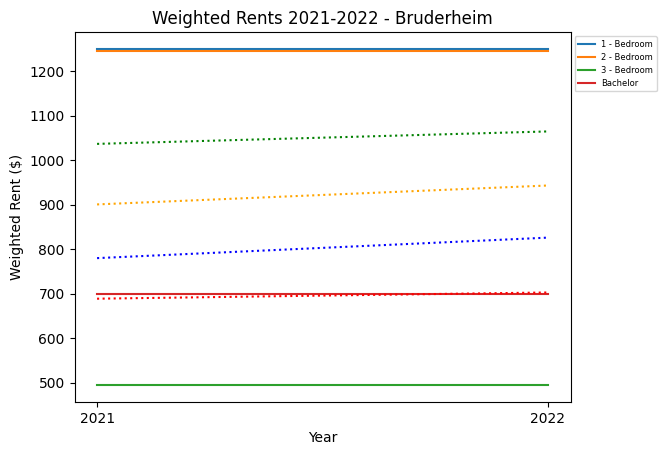

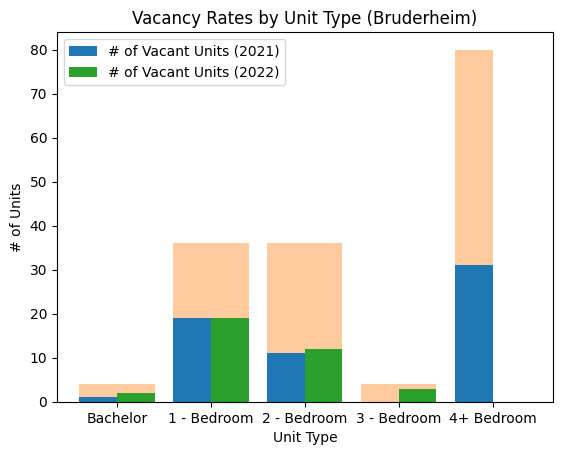

In [25]:
for i in range(len(bruderheim.index)):
    plt.plot(["2021", "2022"], bruderheim_rents.iloc[i], label=bruderheim["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Bruderheim") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

# plot bar graphs of individual unit vacancies
vacancy_2021 = np.array(bruderheim_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(bruderheim_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(bruderheim_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(bruderheim_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(bruderheim_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Bruderheim)")
plt.xticks(x_range, labels=bruderheim_vacancies["2021"].columns)
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.legend()
plt.show()

### Bruderheim
- Experienced no change in rent between 2021-2022 but experienced high vacancy rates
- Very low 3-bedroom rent and also very high 1-2 bedroom rents

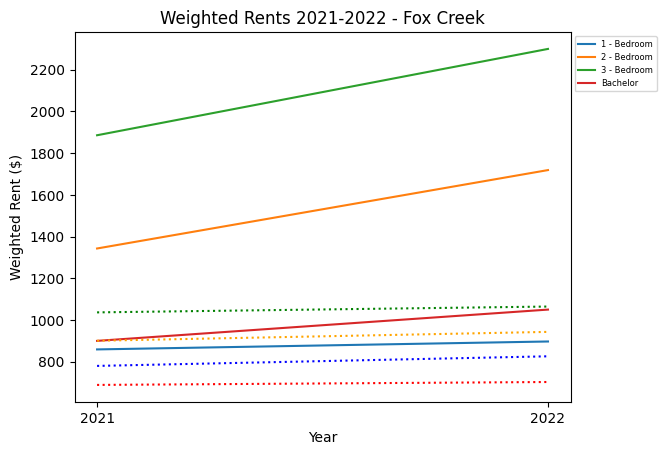

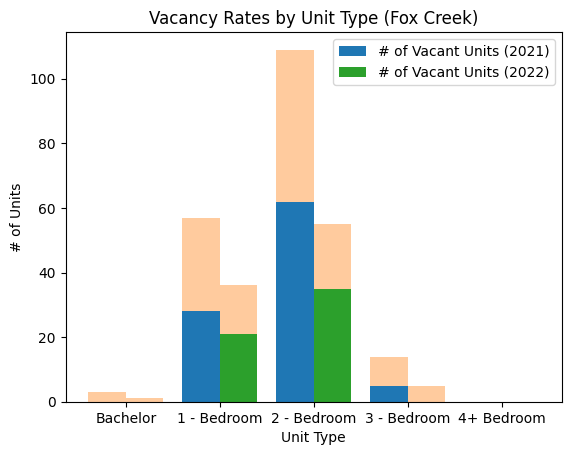

In [26]:
for i in range(len(foxcreek.index)):
    plt.plot(["2021", "2022"], foxcreek_rents.iloc[i], label=foxcreek["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Fox Creek") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(foxcreek_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(foxcreek_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(foxcreek_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(foxcreek_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(foxcreek_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Fox Creek)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=foxcreek_vacancies["2021"].columns)
plt.legend()
plt.show()

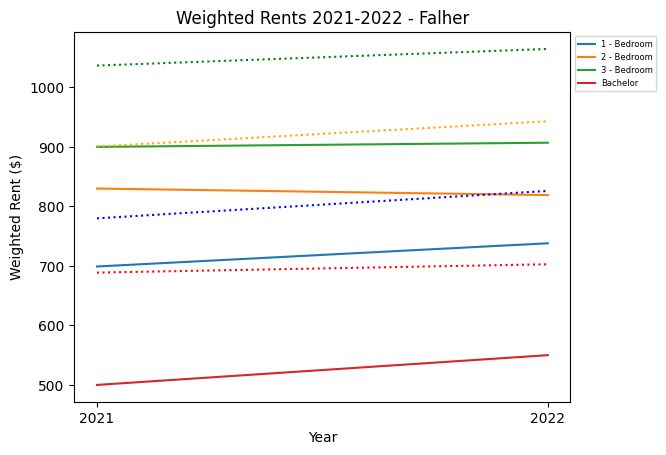

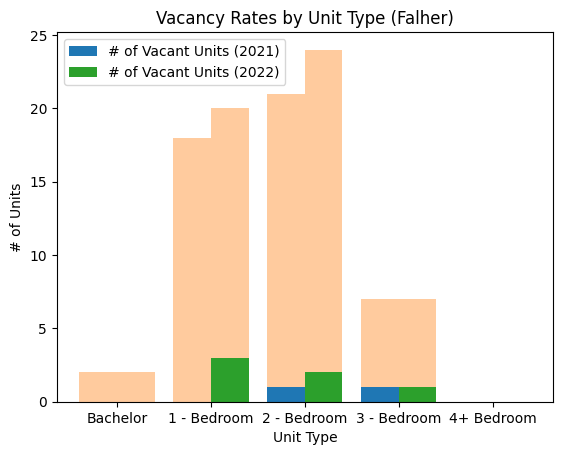

In [27]:
for i in range(len(falher.index)):
    plt.plot(["2021", "2022"], falher_rents.iloc[i], label=falher["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Falher") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(falher_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(falher_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(falher_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(falher_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(falher_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Falher)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=falher_vacancies["2021"].columns)
plt.legend()
plt.show()

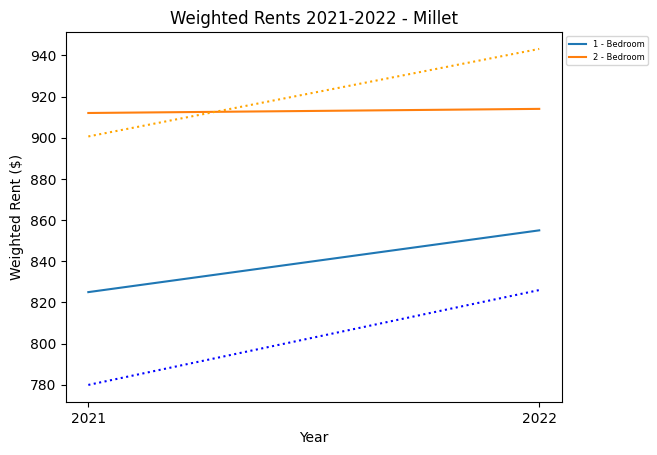

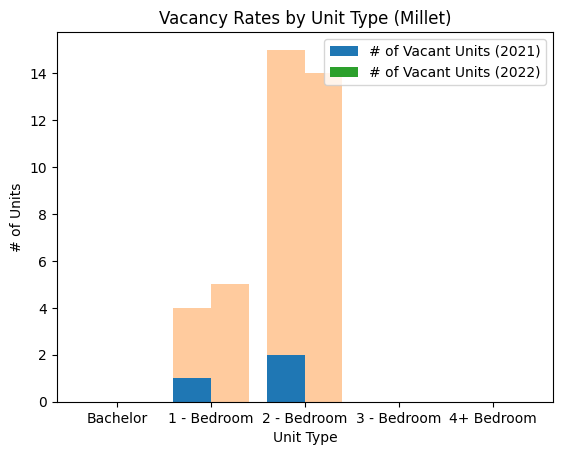

In [28]:
for i in range(len(millet.index)):
    plt.plot(["2021", "2022"], millet_rents.iloc[i], label=millet["Unit Type"].iloc[i])

plotmeans(False, True, True, False, False)
plt.title("Weighted Rents 2021-2022 - Millet") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(millet_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(millet_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(millet_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(millet_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(millet_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Millet)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=millet_vacancies["2021"].columns)
plt.legend()
plt.show()

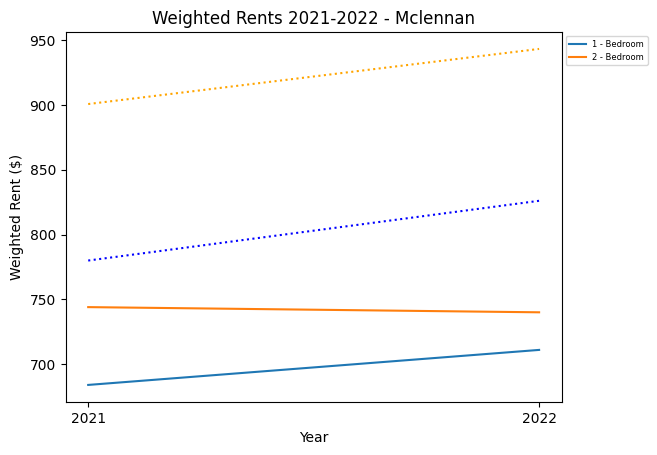

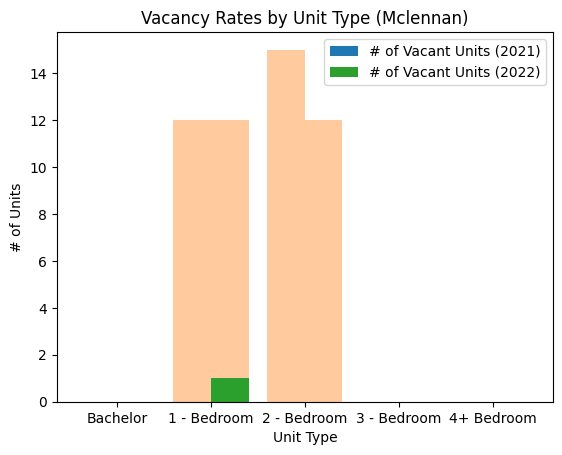

In [29]:
for i in range(len(mclennan.index)):
    plt.plot(["2021", "2022"], mclennan_rents.iloc[i], label=mclennan["Unit Type"].iloc[i])

plotmeans(False, True, True, False, False)
plt.title("Weighted Rents 2021-2022 - Mclennan") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(mclennan_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(mclennan_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(mclennan_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(mclennan_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(mclennan_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Mclennan)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=mclennan_vacancies["2021"].columns)
plt.legend()
plt.show()

### Overall Vacancy Rates between 2021-2022

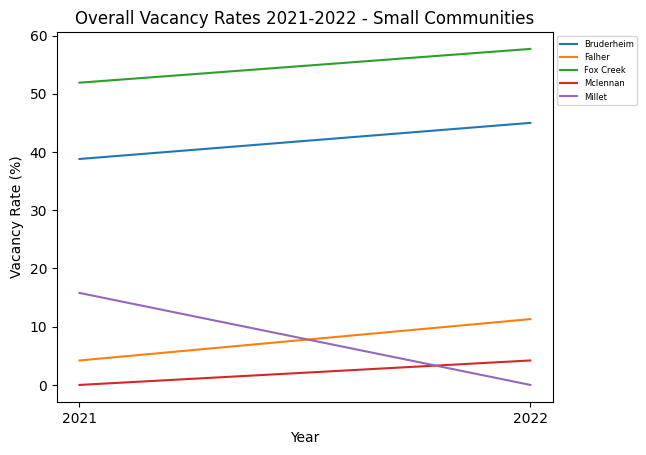

In [30]:
# small town vacancies
vacancy_smalltowns_num = vacancy_smalltowns[["2021 Vacancy", "2022 Vacancy"]]
for i in range(len(vacancy_smalltowns.index)):
    plt.plot(["2021", "2022"], vacancy_smalltowns_num.iloc[i], label=vacancy_smalltowns["Community"].iloc[i])

plt.title("Overall Vacancy Rates 2021-2022 - Small Communities") 
plt.xlabel("Year")
plt.ylabel("Vacancy Rate (%)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

- When most are Below Average --> Overall Smaller Vacancy Rates (High Prairie, Falher)
- When most are Above Average --> Overall larger Vacancy Rates (Bruderheim, Fox Creek)
- Increase in Vacancy Rates between the two years overall for the aforementioned cases
- Overall relatively more drastic patterns I think (we will see later)

<u>Note</u>:
- Main idea with small towns is smaller rents usually due to smaller populations, so might this affect vacancy rates?
- Usually less housing types or smaller rents noticed compared to average, keep note of this
- Falher and Tofield might be interesting since both have similar trends but Falher has more decrease
- Even if nothing remarkable comes of this, still remark it

<br>

- Noticed that cases with massive diffence from average will usually have high vacancy rates and increase in it, regradless of town size
- Less Unit Types --> Less Units --> Probably why no vacancies maybe --> both have similar trends but millet has a higher price roof than mclennan, and has a decrease in vacancy rates whereas mclennan had an increase

---------------------------------

## **Analysis of Medium Communities**

*Population Size: (2493-5760)*

In [31]:
# list of medium towns (size 2493-5760)
med_towns = table10_cleaned[table10_cleaned["2022"].between(population_bins[1], population_bins[2], inclusive='right')]
med_towns

,Area Name,Type,2022
308,Athabasca,T,2827
296,Barrhead,T,4503
85,Black Diamond,T,2825
29,Cardston,T,3828
96,Carstairs,T,5181
38,Claresholm,T,3957
98,Didsbury,T,5172
425,Fairview,T,2914
36,Fort Macleod,T,3499
402,Grande Cache,T,3276


In [32]:
medtowns = ["Jasper", "Claresholm", "Grimshaw", "Raymond", "Fort Macleod"]

costs_medtowns = table8[table8["Community"].isin(medtowns)]
vacancy_medtowns = table6[table6["Community"].isin(medtowns)]

jasper = costs_medtowns[costs_medtowns["Community"] == "Jasper"]
claresholm = costs_medtowns[costs_medtowns["Community"] == "Claresholm"]
grimshaw = costs_medtowns[costs_medtowns["Community"] == "Grimshaw"]
raymond = costs_medtowns[costs_medtowns["Community"] == "Raymond"]
fortmac = costs_medtowns[costs_medtowns["Community"] == "Fort Macleod"]

jasper_rents = jasper[["2021 Weighted Rent", "2022 Weighted Rent"]]
claresholm_rents = claresholm[["2021 Weighted Rent", "2022 Weighted Rent"]]
grimshaw_rents = grimshaw[["2021 Weighted Rent", "2022 Weighted Rent"]]
raymond_rents = raymond[["2021 Weighted Rent", "2022 Weighted Rent"]]
fortmac_rents = fortmac[["2021 Weighted Rent", "2022 Weighted Rent"]]

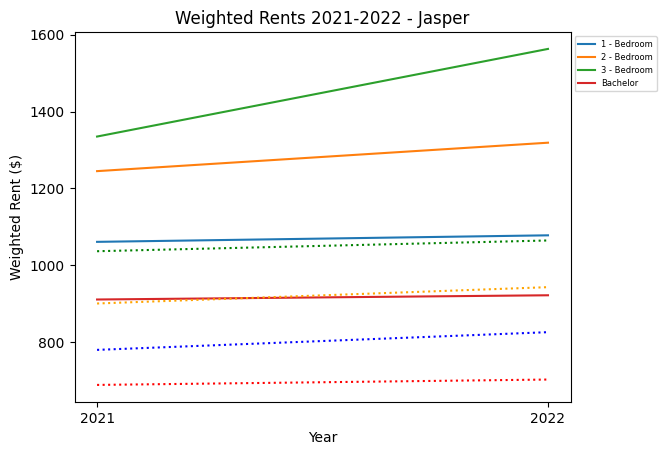

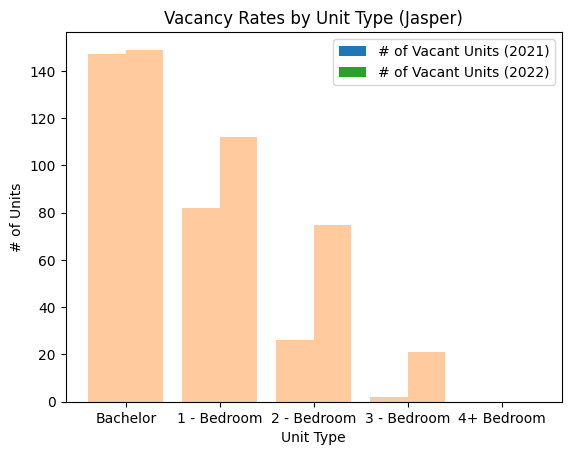

In [33]:
# Why we used this? --> decrease but low
for i in range(len(jasper.index)):
    plt.plot(["2021", "2022"], jasper_rents.iloc[i], label=jasper["Unit Type"].iloc[i])

plt.plot([mean_bachelors2021, mean_bachelors2022], linestyle='dotted', color="r")
plt.plot([mean_1beds2021, mean_1beds2022], linestyle='dotted', color="b")
plt.plot([mean_2beds2021, mean_2beds2022], linestyle='dotted', color="orange")
plt.plot([mean_3beds2021, mean_3beds2022], linestyle='dotted', color="g")
plt.title("Weighted Rents 2021-2022 - Jasper") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(jasper_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(jasper_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(jasper_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(jasper_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(jasper_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Jasper)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=jasper_vacancies["2021"].columns)
plt.legend()
plt.show()

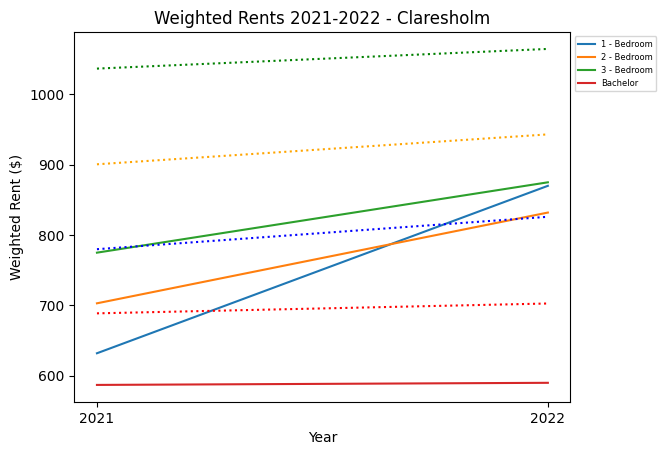

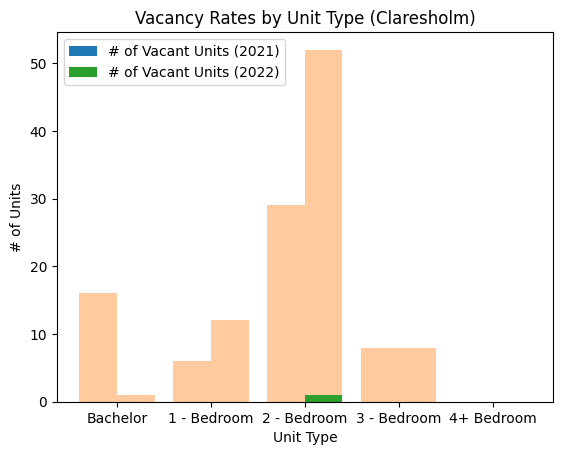

In [34]:
# Why we used this? --> lower prices for all but increase 
for i in range(len(claresholm.index)):
    plt.plot(["2021", "2022"], claresholm_rents.iloc[i], label=claresholm["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Claresholm") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(claresholm_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(claresholm_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(claresholm_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(claresholm_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(claresholm_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Claresholm)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=claresholm_vacancies["2021"].columns)
plt.legend()
plt.show()

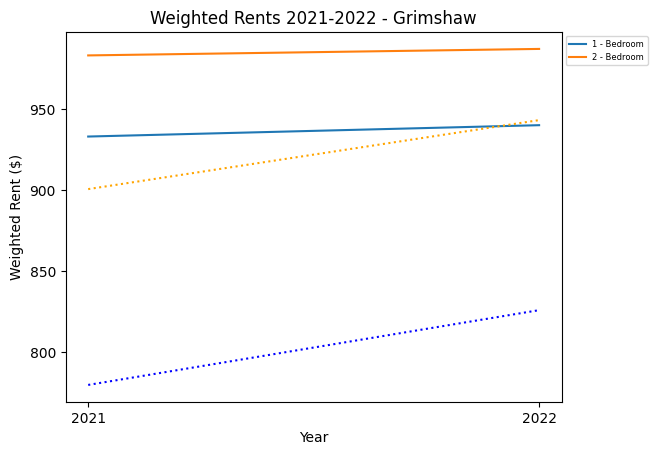

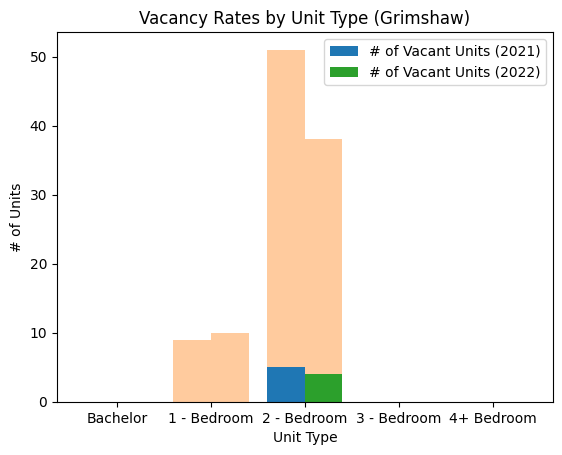

In [35]:
# Why we used this? -->
for i in range(len(grimshaw.index)):
    plt.plot(["2021", "2022"], grimshaw_rents.iloc[i], label=grimshaw["Unit Type"].iloc[i])

plotmeans(False, True, True, False, False)
plt.title("Weighted Rents 2021-2022 - Grimshaw") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(grimshaw_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(grimshaw_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(grimshaw_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(grimshaw_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(grimshaw_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Grimshaw)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=grimshaw_vacancies["2021"].columns)
plt.legend()
plt.show()

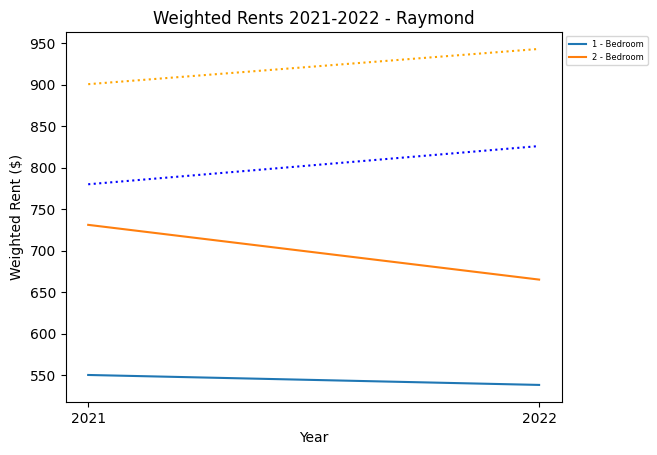

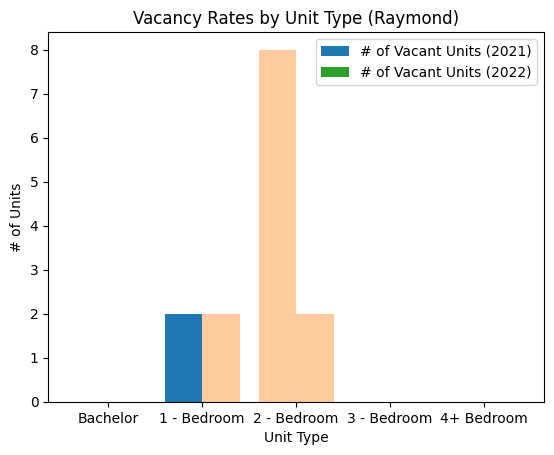

In [36]:
# Why we used this? -->
for i in range(len(raymond.index)):
    plt.plot(["2021", "2022"], raymond_rents.iloc[i], label=raymond["Unit Type"].iloc[i])

plotmeans(False, True, True, False, False)
plt.title("Weighted Rents 2021-2022 - Raymond") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(raymond_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(raymond_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(raymond_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(raymond_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(raymond_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Raymond)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=raymond_vacancies["2021"].columns)
plt.legend()
plt.show()

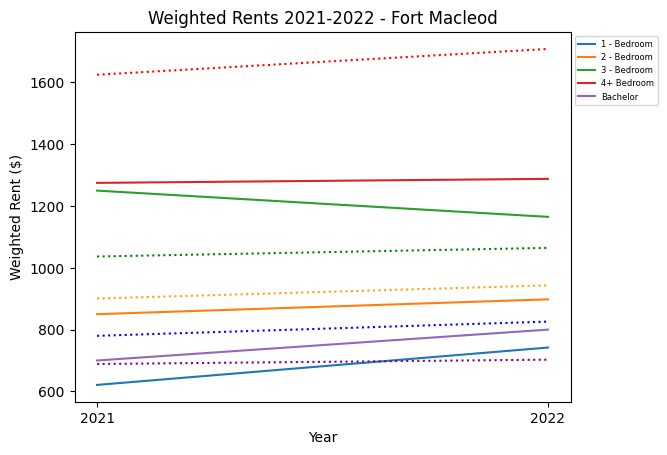

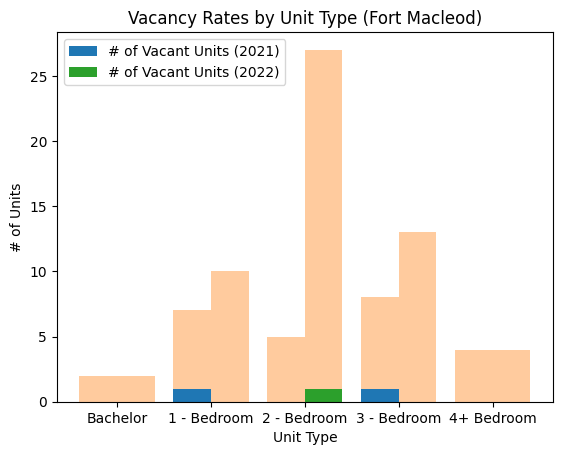

In [37]:
# Why we used this? --> Includes 4+ Town --> Compare w/ Banff
for i in range(len(fortmac.index)):
    plt.plot(["2021", "2022"], fortmac_rents.iloc[i], label=fortmac["Unit Type"].iloc[i])

plotmeans(True, True, True, True, True)
plt.title("Weighted Rents 2021-2022 - Fort Macleod") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(fortmac_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(fortmac_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(fortmac_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(fortmac_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(fortmac_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Fort Macleod)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=fortmac_vacancies["2021"].columns)
plt.legend()
plt.show()

### Overall Vacancy Rates between 2021-2022

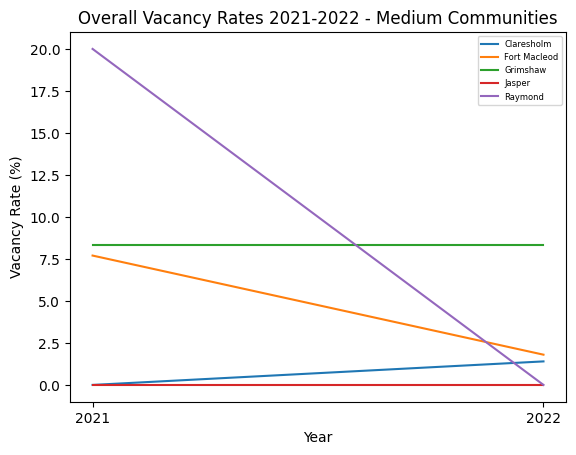

In [38]:
vacancy_medtowns_num = vacancy_medtowns[["2021 Vacancy", "2022 Vacancy"]]
for i in range(len(vacancy_medtowns.index)):
    plt.plot(["2021", "2022"], vacancy_medtowns_num.iloc[i], label=vacancy_medtowns["Community"].iloc[i])

plt.title("Overall Vacancy Rates 2021-2022 - Medium Communities") 
plt.xlabel("Year")
plt.ylabel("Vacancy Rate (%)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

<u>Notes</u>:
- dd

----------------------------------
## **Analysis of Large Communities**

*Population Size: (5761-14,996)*

In [39]:
# list of large towns (size 5760-14996)
big_towns = table10_cleaned[table10_cleaned["2022"].between(population_bins[2], population_bins[3], inclusive='right')]
big_towns

,Area Name,Type,2022
330,Banff,T,9347
150,Blackfalds,T,11363
256,Bonnyville,T,6632
18,Coaldale,T,9179
322,Crowsnest Pass,SM,5910
226,Drayton Valley,T,7482
68,Drumheller,T,8231
320,Edson,T,8399
81,High River,T,14996
319,Hinton,T,9933


In [40]:
bigtowns = ["Slave Lake", "Ponoka", "Banff","Taber", "Edson"]

costs_bigtowns = table8[table8["Community"].isin(bigtowns)]
vacancy_bigtowns = table6[table6["Community"].isin(bigtowns)]

slavelake = costs_bigtowns[costs_bigtowns["Community"] == "Slave Lake"]
ponoka = costs_bigtowns[costs_bigtowns["Community"] == "Ponoka"] 
banff = costs_bigtowns[costs_bigtowns["Community"] == "Banff"]
taber = costs_bigtowns[costs_bigtowns["Community"] == "Taber"] # Taber --> Increase + Lower Roofs, potentially compare with claresholm
edson = costs_bigtowns[costs_bigtowns["Community"] == "Edson"] # good for seeing how higher average rent roof affects but not like outliers i think

slavelake_rents = slavelake[["2021 Weighted Rent", "2022 Weighted Rent"]]
ponoka_rents = ponoka[["2021 Weighted Rent", "2022 Weighted Rent"]]
banff_rents = banff[["2021 Weighted Rent", "2022 Weighted Rent"]]
taber_rents = taber[["2021 Weighted Rent", "2022 Weighted Rent"]]
edson_rents = edson[["2021 Weighted Rent", "2022 Weighted Rent"]]

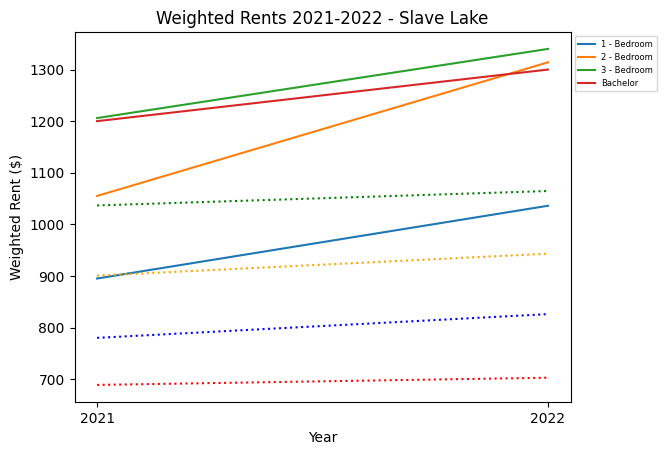

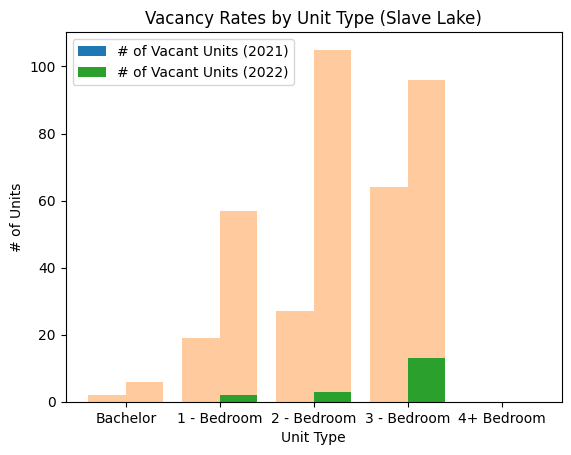

In [41]:
for i in range(len(slavelake.index)):
    plt.plot(["2021", "2022"], slavelake_rents.iloc[i], label=slavelake["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Slave Lake") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(slavelake_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(slavelake_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(slavelake_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(slavelake_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(slavelake_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Slave Lake)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.legend()
plt.xticks(x_range, labels=slavelake_vacancies["2021"].columns)
plt.show()

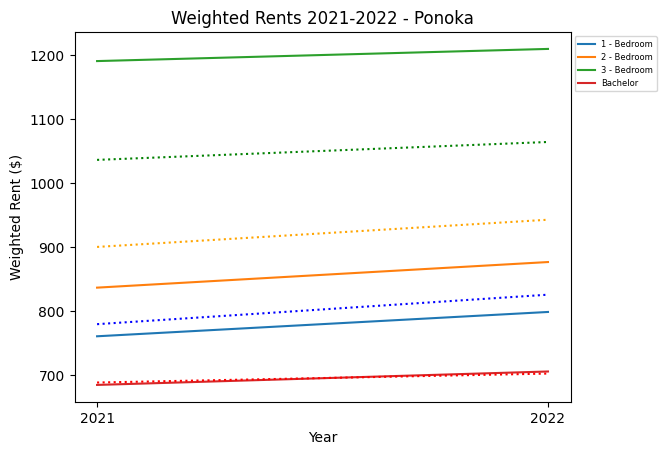

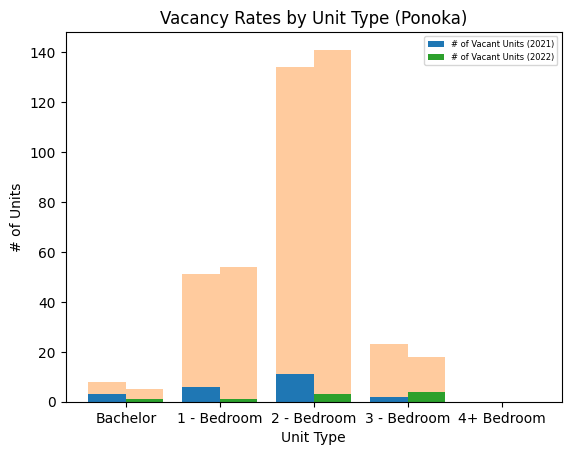

In [42]:
# Why we used this? -->
for i in range(len(ponoka.index)):
    plt.plot(["2021", "2022"], ponoka_rents.iloc[i], label=ponoka["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Ponoka") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(ponoka_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(ponoka_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(ponoka_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(ponoka_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(ponoka_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Ponoka)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.legend(prop={'size': 6})
plt.xticks(x_range, labels=ponoka_vacancies["2021"].columns)
plt.show()

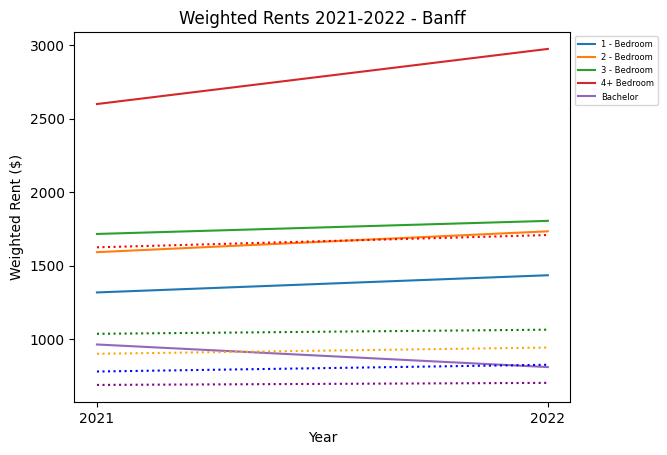

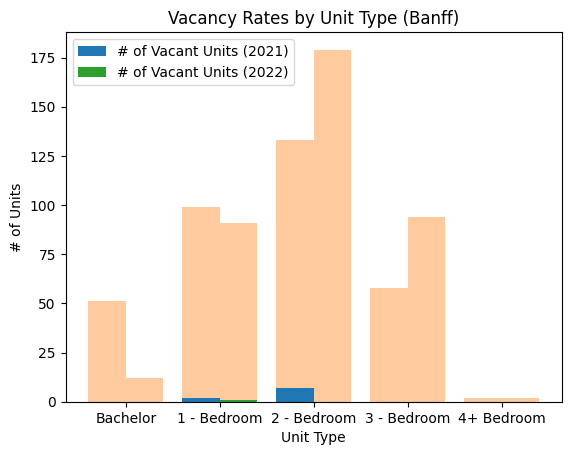

In [43]:
# Why we used this? -->
for i in range(len(banff.index)):
    plt.plot(["2021", "2022"], banff_rents.iloc[i], label=banff["Unit Type"].iloc[i])

plotmeans(True, True, True, True, True)
plt.title("Weighted Rents 2021-2022 - Banff") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(banff_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(banff_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(banff_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(banff_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(banff_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Banff)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=banff_vacancies["2021"].columns)
plt.legend()
plt.show()

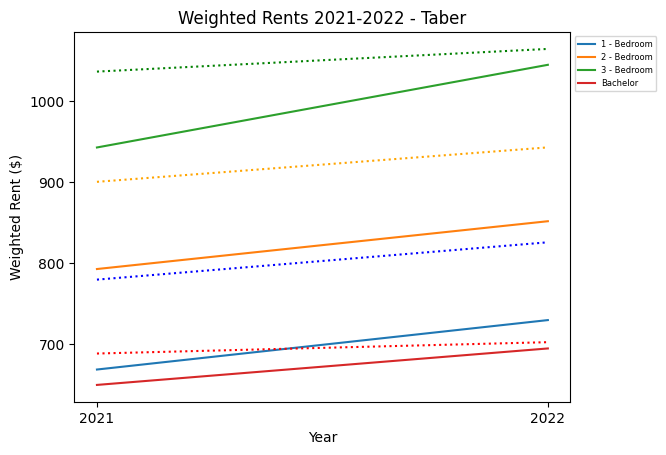

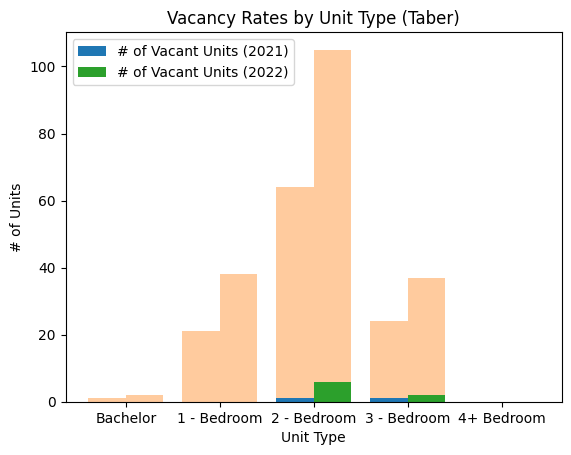

In [44]:
# Why we used this? -->
for i in range(len(taber.index)):
    plt.plot(["2021", "2022"], taber_rents.iloc[i], label=taber["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Taber") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(taber_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(taber_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(taber_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(taber_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(taber_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Taber)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=taber_vacancies["2021"].columns)
plt.legend()
plt.show()

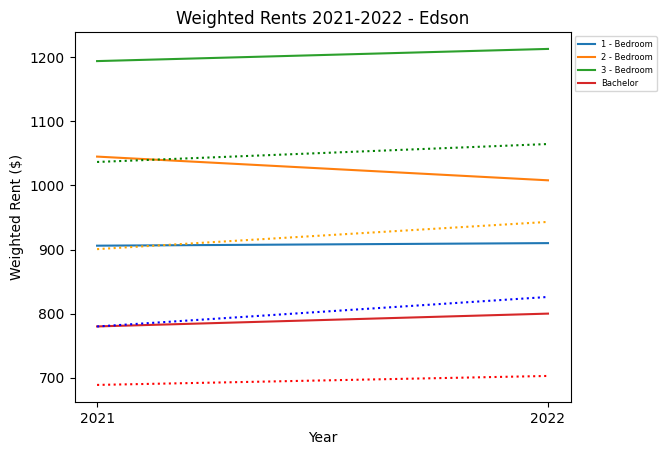

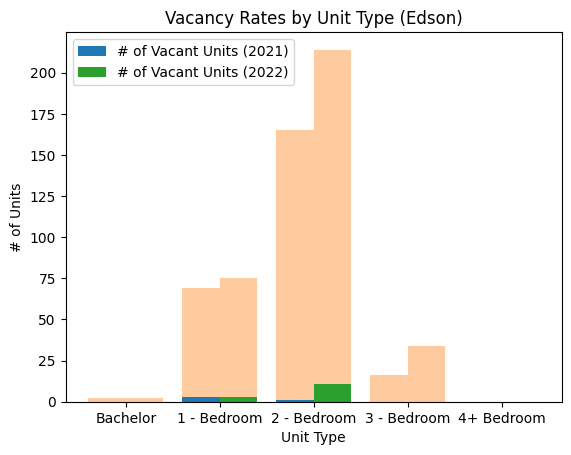

In [45]:
# Why we used this? -->
for i in range(len(edson.index)):
    plt.plot(["2021", "2022"], edson_rents.iloc[i], label=edson["Unit Type"].iloc[i])

plotmeans(True, True, True, True, False)
plt.title("Weighted Rents 2021-2022 - Edson") 
plt.xlabel("Year")
plt.ylabel("Weighted Rent ($)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

vacancy_2021 = np.array(edson_vacancies["2021"].loc["Vacancies"])
vacancy_2022 = np.array(edson_vacancies["2022"].loc["Vacancies"])

num_units_2021 = np.array(edson_vacancies["2021"].loc["Number of Units"])
num_units_2022 = np.array(edson_vacancies["2022"].loc["Number of Units"])

x_range = np.arange(len(edson_vacancies["2021"].columns)) # create (also allows us to offset the bars)

plt.bar(x_range - 0.2, vacancy_2021, 0.4, label="# of Vacant Units (2021)")
plt.bar(x_range - 0.2, num_units_2021 - vacancy_2021, 0.4, bottom=vacancy_2021, alpha=0.4)
plt.bar(x_range + 0.2, vacancy_2022, 0.4, color="C2", label="# of Vacant Units (2022)")
plt.bar(x_range + 0.2, num_units_2022 - vacancy_2022, 0.4, bottom=vacancy_2022, alpha=0.4, color="C1")
plt.title("Vacancy Rates by Unit Type (Edson)")
plt.xlabel("Unit Type")
plt.ylabel("# of Units")
plt.xticks(x_range, labels=edson_vacancies["2021"].columns)
plt.legend()
plt.show()

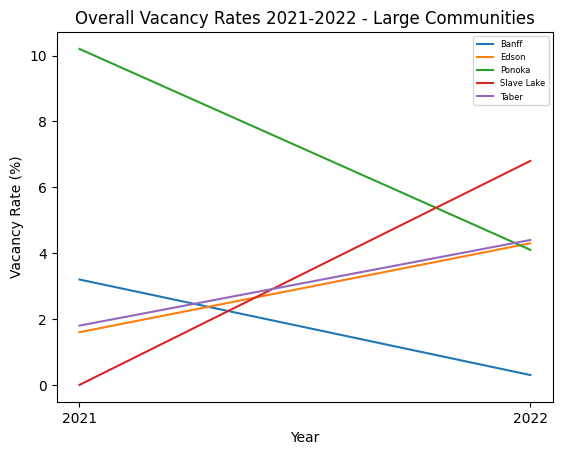

In [46]:
# Why we used this? -->
vacancy_bigtowns_num = vacancy_bigtowns[["2021 Vacancy", "2022 Vacancy"]]
for i in range(len(vacancy_bigtowns.index)):
    plt.plot(["2021", "2022"], vacancy_bigtowns_num.iloc[i], label=vacancy_bigtowns["Community"].iloc[i])

plt.title("Overall Vacancy Rates 2021-2022 - Large Communities") 
plt.xlabel("Year")
plt.ylabel("Vacancy Rate (%)")
plt.legend(prop={'size': 6}, bbox_to_anchor=(1,1))
plt.show()

-----